In [6]:
import sys
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from Data_Generation_Functions import *
import numpy as np
from IPython.display import clear_output
from scipy.optimize import curve_fit

c_FS = "blue"
c_BIC = "Red"
c_BIC_Inf = "lawngreen"
C_BIC_800 = "orange"
a = Distance_Class(400, "Nano") #QE Array constant

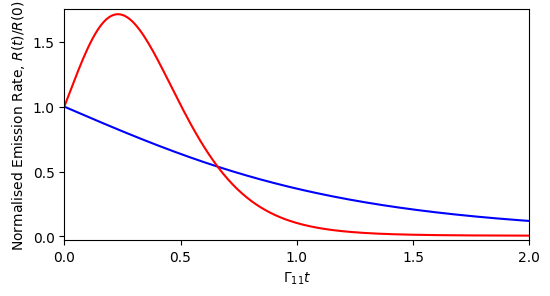

In [7]:
# Fig 7 Emission Rate of the MDBIC vs Free space for a=400nm
wave = Distance_Class(708.9, "Nano") #MDBIC wavelength
d = Dipole_Moment_Class([0,1,0], "Nat")
N_Row = 3 #Number of emitters per row
Dim = 2


N_Sca = 3 # Number of scatterers is (2*N_Sca +1)^2
t_max = 2 #Max time to run to (actual time is t_max * Gamma[0][0])

fig, ax = plt.subplots(figsize=(6, 3))

Inv_FS = Inverted_Array(BIC_Type.FS_MD)
File_FS = Inv_FS.Compute_Emission_Data(N_Row, a, t_max)
Data = Read_Write_Class.Read_From_File(File_FS)
t_FS, R_FS = map(list, zip(*Data))
ax.plot(t_FS, R_FS, c=c_FS)

Inv_MDBIC = Inverted_Array(BIC_Type.MDBIC, N_Sca=10)
File_MDBIC = Inv_MDBIC.Compute_Emission_Data(N_Row, a, t_max)
Data = Read_Write_Class.Read_From_File(File_MDBIC)
t_MDBIC, R_MDBIC = map(list, zip(*Data))
ax.plot(t_MDBIC, R_MDBIC, c=c_BIC)


ax.set_ylim([-0.03,1.75])
ax.set_xlim([0,2])
ax.set_yticks([0,0.5,1,1.5])
ax.set_xticks([0,0.5,1,1.5,2])
ax.set_xlabel("$\Gamma_{11} t$")
ax.set_ylabel("Normalised Emission Rate, $R(t)/R(0)$")
plt.show()

/var/folders/v9/tkrj32v93f7gq23z84qvvd8c0000gn/T/ipykernel_68334/1830102680.py:39: RuntimeWarning: invalid value encountered in log2
  return A + B * np.log2(C * N)


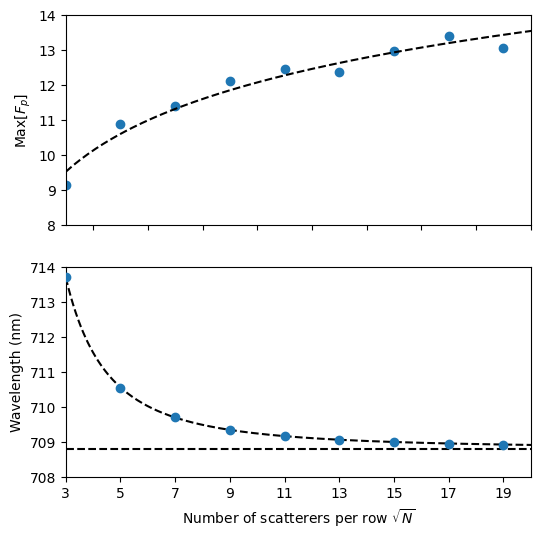

In [8]:
# Fig 4 Convergance of max Purcell factor and corresponding wavelengths

wave_set = Distance_Class(np.linspace(705, 715, 201), "Nano")


fig, ax = plt.subplots(2, 1, figsize=(6, 6))

Purcell_Max = []
Wave_Max = []

N_Sca_Set = np.arange(1, 11)
for N_Sca in N_Sca_Set:
    Inv_MDBIC = Inverted_Array(BIC_Type.MDBIC, N_Sca=N_Sca)
    File_MDBIC = Inv_MDBIC.Generate_Purcell_Data(wave_set)
    Data = Read_Write_Class.Read_From_File(File_MDBIC)
    wave_MDBIC, Purcell_MDBIC = map(list, zip(*Data))
    clear_output(wait=True) 
    index = Purcell_MDBIC.index(max(Purcell_MDBIC))
    Wave_Max.append(wave_MDBIC[index])
    Purcell_Max.append(Purcell_MDBIC[index])


def model_inv(N, c, A, P):
    return c + A / N**P

c0 = Wave_Max[-1]                     # asymptotic value
A0 = (Wave_Max[0] - c0) * (2*N_Sca_Set+1)[0]   # crude amplitude guess
P0 = 1.0 
p0 = [c0, A0, P0]
params, cov = curve_fit(model_inv, 2*N_Sca_Set +1, Wave_Max, p0=p0)
c, A, P = params

smooth_N = 2*np.linspace(1, max(N_Sca_Set), 200)+1
ax[1].plot(smooth_N, model_inv(smooth_N, c, A, P), linestyle='dashed', c='black')
ax[1].plot([1, max(smooth_N)], [c,c], linestyle='dashed', c='black')


def model_ln(N, A, B, C):
    return A + B * np.log2(C * N)

# Initial guesses
A0 = np.mean(Purcell_Max)
B0 = (Purcell_Max[-1] - Purcell_Max[0]) / (np.log(N_Sca_Set[-1]) - np.log(N_Sca_Set[0]))
C0 = 1.0  # often 1 is a good starting point
p0 = [A0, B0, C0]

params, cov = curve_fit(model_ln, 2*N_Sca_Set +1, Purcell_Max, p0=p0)
A, B, C = params
ax[0].plot(smooth_N, model_ln(smooth_N, A, B, C), linestyle='dashed', c='black')




ax[0].scatter(2*N_Sca_Set +1, Purcell_Max)
ax[1].scatter(2*N_Sca_Set +1, Wave_Max, zorder=5)

ax[0].plot([21,21], [8,14], c='black', linestyle='dashed')
ax[1].plot([21,21], [708,714], c='black', linestyle='dashed')

ax[1].set_xlabel("Number of scatterers per row $\sqrt{N}$")
ax[1].set_xticks(2*N_Sca_Set + 1)
ax[0].set_xticks(2*N_Sca_Set, ["" for i in range(len(N_Sca_Set))])

ax[0].set_ylim([8,14])
ax[1].set_ylim([708,714])

for i in range(2):
    ax[i].set_xlim([3, 2*N_Sca_Set[-1]])

ax[0].set_ylabel("Max[$F_p$]")
ax[1].set_ylabel("Wavelength (nm)")
plt.show()


Computing G2: 100%|██████████| 301/301 [39:57:34<00:00, 477.92s/congig]


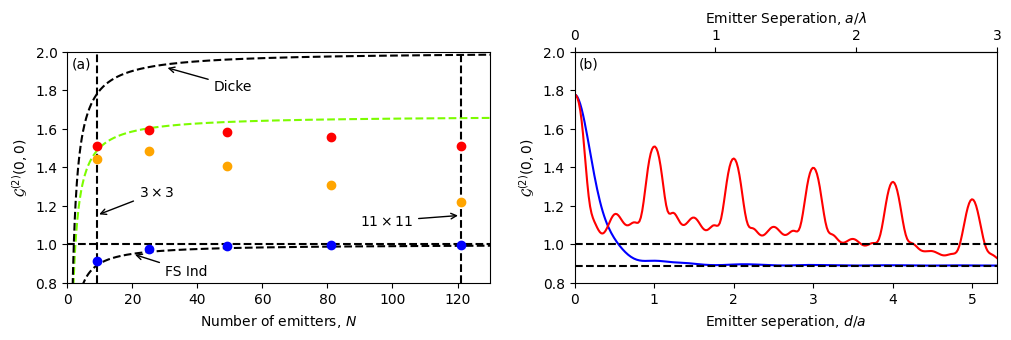

In [9]:
N_Sca = 10
N_Row_Max = 11

Sep_Max = 3 #In units of lambda

fig, axes = plt.subplots(1, 2, figsize=(12, 3))

Inv_FS = Inverted_Array(BIC_Type.FS_MD, N_Sca=N_Sca)
File_FS = Inv_FS.Compute_G2_Vs_NQE(N_Row_Max)
Data = Read_Write_Class.Read_From_File(File_FS)
N_FS, G2_FS = map(list, zip(*Data))
axes[0].scatter(np.array(N_FS)**2, G2_FS, zorder=5, c=c_FS)

Inv_MDBIC = Inverted_Array(BIC_Type.MDBIC, N_Sca=N_Sca)
File_MDBIC = Inv_MDBIC.Compute_G2_Vs_NQE(N_Row_Max)
Data = Read_Write_Class.Read_From_File(File_MDBIC)
N_MDBIC, G2_MDBIC = map(list, zip(*Data))
axes[0].scatter(np.array(N_MDBIC)**2, G2_MDBIC, zorder=5, c=c_BIC)

Inv_MDBIC = Inverted_Array(BIC_Type.MDBIC, N_Sca=N_Sca)
File_MDBIC = Inv_MDBIC.Compute_G2_Vs_NQE(N_Row_Max, Distance_Class(800, "Nano"))
Data = Read_Write_Class.Read_From_File(File_MDBIC)
N_MDBIC, G2_MDBIC = map(list, zip(*Data))
axes[0].scatter(np.array(N_MDBIC)**2, G2_MDBIC, zorder=5, c=C_BIC_800)

beta= 0.8179
n = np.linspace(1,130, 1000)
axes[0].plot(n, (1+beta**2)*(n-1)/n, c=c_BIC_Inf, linestyle='dashed')


N_Row_QE = 3
scale = 100 #Must be int for efficiency
d_set = np.linspace(0, Sep_Max, scale*Sep_Max+1)

File_FS = Inv_FS.Compute_G2_Vs_d(d_set, N_Row_QE)
Data = Read_Write_Class.Read_From_File(File_FS)
d_FS, G2_FS = map(list, zip(*Data))
d_FS, G2_FS = Read_Write_Class.Sort_Both_Lists(d_FS, G2_FS)
axes[1].plot(Inv_MDBIC.wave.Nano*np.array(d_FS)/a.Nano, G2_FS, c=c_FS)

File_MDBIC = Inv_MDBIC.Compute_G2_Vs_d(d_set, N_Row_QE)
Data = Read_Write_Class.Read_From_File(File_MDBIC)
d_MDBIC, G2_MDBIC = map(list, zip(*Data))
d_MDBIC, G2_MDBIC = Read_Write_Class.Sort_Both_Lists(d_MDBIC, G2_MDBIC)
axes[1].plot(Inv_MDBIC.wave.Nano*np.array(d_MDBIC)/a.Nano, G2_MDBIC, c=c_BIC)



secax = axes[1].secondary_xaxis("top",functions=(lambda x: x * a.Nano/Inv_MDBIC.wave.Nano, lambda x: x * Inv_MDBIC.wave.Nano/a.Nano) )
secax.set_xticks(np.arange(0, Sep_Max+1))
secax.set_xlabel("Emitter Seperation, $a/\lambda$")

axes[0].plot([121,121],[0.8,2], c='black', linestyle='dashed')
axes[0].plot([9,9],[0.8,2], c='black', linestyle='dashed')
axes[0].plot(n, 2*(n-1)/n, c='black', linestyle='dashed')
axes[0].plot(n, (n-1)/n, c='black', linestyle='dashed')
axes[1].plot([0,6], [8/9, 8/9], c='black', linestyle='dashed')


for i in range(2):
    axes[i].set_ylim([0.8,2])
    axes[i].plot([0, 130], [1,1], c='black', linestyle='dashed')
    axes[i].set_ylabel("$\mathcal{G}^{(2)}(0,0)$")
    

axes[0].set_xlabel("Number of emitters, $N$")
axes[1].set_xlabel("Emitter seperation, $d/a$")
axes[0].set_xlim([0, 130])
axes[1].set_xlim([0, Sep_Max*Inv_MDBIC.wave.Nano/a.Nano])

axes[0].annotate("$3\\times3$", xy=(9, 1.15),  xytext=(22, 1.25), arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)
axes[0].annotate("$11\\times11$", xy=(121, 1.15),  xytext=(90, 1.1), arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)
axes[0].annotate("Dicke", xy=(30, 1.92),  xytext=(45, 1.8), arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)
axes[0].annotate("FS Ind", xy=(20, 19/20),  xytext=(30, 0.84), arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)

axes[0].text(0.01, 0.93, "(a)", transform=axes[0].transAxes)
axes[1].text(0.01, 0.93, "(b)", transform=axes[1].transAxes)
plt.show()